<a href="https://colab.research.google.com/github/helah20/Machine_learning/blob/main/Churnc_with_confusion_Matrix_of_02_assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Logistic Regression Assignment

#### Dataset Options
1. Dog or horse
    - `https://github.com/gumdropsteve/datasets/raw/master/dog_or_horse.csv`
    - Note: target variable is `target`.
2. Customer Churn
    - `https://github.com/gumdropsteve/intro_to_machine_learning/raw/main/day_05/data/churn_data.csv`
    - [Data dict](https://docs.google.com/document/d/1SxzoPHWxoLHx_kiPTZEzZOoda2chHbHLdMGAFsGIqCY/edit?usp=sharing)
    - Note: target variable is `Churn`


1. Load in your dataset through its CSV link.

In [93]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import *

In [94]:
df=pd.read_csv('https://github.com/gumdropsteve/intro_to_machine_learning/raw/main/day_05/data/churn_data.csv')

2. Find out some information about the data **EDA**...

In [95]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,5087-SUURX,Female,0,Yes,No,18,No,No phone service,DSL,No,No,Yes,No,Yes,No,Month-to-month,Yes,Electronic check,39.05,669.85,Yes
1,1764-VUUMT,Male,0,No,Yes,66,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Credit card (automatic),19.95,1269.1,No
2,0089-IIQKO,Female,0,Yes,Yes,39,Yes,Yes,Fiber optic,No,No,No,Yes,Yes,Yes,Month-to-month,Yes,Credit card (automatic),99.95,3767.4,No
3,1960-UYCNN,Male,0,No,No,10,Yes,Yes,Fiber optic,No,Yes,Yes,No,No,Yes,Month-to-month,Yes,Electronic check,95.25,1021.55,No
4,8224-IVVPA,Female,0,No,No,27,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,56.70,1652.95,No


In [96]:
df.tail()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
6333,5119-KEPFY,Male,0,Yes,No,36,Yes,Yes,Fiber optic,No,No,No,No,Yes,Yes,Month-to-month,Yes,Bank transfer (automatic),95.00,3440.25,No
6334,6923-JHPMP,Female,0,No,No,2,Yes,No,Fiber optic,Yes,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,80.45,137.1,No
6335,9924-JPRMC,Male,0,No,No,72,Yes,Yes,Fiber optic,Yes,Yes,Yes,Yes,Yes,Yes,Two year,Yes,Electronic check,118.20,8547.15,No
6336,4098-NAUKP,Male,1,Yes,Yes,68,Yes,Yes,Fiber optic,No,Yes,Yes,No,No,No,Month-to-month,Yes,Electronic check,84.65,5683.6,No
6337,1775-KWJKQ,Male,0,Yes,Yes,72,Yes,Yes,DSL,Yes,Yes,Yes,Yes,Yes,Yes,Two year,No,Credit card (automatic),89.85,6562.9,No


In [97]:
df.sample()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
4199,8904-OPDCK,Male,1,Yes,No,54,No,No phone service,DSL,No,No,No,No,No,No,Month-to-month,Yes,Bank transfer (automatic),24.95,1364.75,No


In [98]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6338 entries, 0 to 6337
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        6338 non-null   object 
 1   gender            6338 non-null   object 
 2   SeniorCitizen     6338 non-null   int64  
 3   Partner           6338 non-null   object 
 4   Dependents        6338 non-null   object 
 5   tenure            6338 non-null   int64  
 6   PhoneService      6338 non-null   object 
 7   MultipleLines     6338 non-null   object 
 8   InternetService   6338 non-null   object 
 9   OnlineSecurity    6338 non-null   object 
 10  OnlineBackup      6338 non-null   object 
 11  DeviceProtection  6338 non-null   object 
 12  TechSupport       6338 non-null   object 
 13  StreamingTV       6338 non-null   object 
 14  StreamingMovies   6338 non-null   object 
 15  Contract          6338 non-null   object 
 16  PaperlessBilling  6338 non-null   object 


In [99]:
df.shape

(6338, 21)

In [100]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,6338.000000,6338.000000,6338.000000
mean,0.161723,32.283843,64.983236
std,0.368226,24.529521,29.992970
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,36.450000
50%,0.000000,29.000000,70.500000
75%,0.000000,55.000000,90.000000
max,1.000000,72.000000,118.600000


In [101]:
# Identify if there is any missing values

df.isnull().sum()


customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [102]:
df.value_counts()

customerID  gender  SeniorCitizen  Partner  Dependents  tenure  PhoneService  MultipleLines     InternetService  OnlineSecurity       OnlineBackup         DeviceProtection     TechSupport          StreamingTV          StreamingMovies      Contract        PaperlessBilling  PaymentMethod              MonthlyCharges  TotalCharges  Churn
9995-HOTOH  Male    0              Yes      Yes         63      No            No phone service  DSL              Yes                  Yes                  Yes                  No                   Yes                  Yes                  Two year        No                Electronic check           59.00           3707.6        No       1
3374-TTZTK  Male    0              Yes      No          52      Yes           No                Fiber optic      Yes                  Yes                  Yes                  Yes                  Yes                  Yes                  Two year        Yes               Electronic check           106.30          5487   

In [103]:
df.gender.value_counts()

Male      3197
Female    3141
Name: gender, dtype: int64

In [104]:
df.Churn.value_counts()

No     4650
Yes    1688
Name: Churn, dtype: int64

In [105]:
df.SeniorCitizen.value_counts()

0    5313
1    1025
Name: SeniorCitizen, dtype: int64

In [106]:
df.Partner.value_counts()

No     3267
Yes    3071
Name: Partner, dtype: int64

In [107]:
df.Dependents.unique()

array(['No', 'Yes'], dtype=object)

3. Show me the relationships in your data... 
- corr ([help](https://stackoverflow.com/a/50703596/11074111))
- pariplot
- some other visualization(s) (of your choice)

In [108]:
corr=df.corr()
corr

,SeniorCitizen,tenure,MonthlyCharges
SeniorCitizen,1.000000,0.020302,0.216512
tenure,0.020302,1.000000,0.253420
MonthlyCharges,0.216512,0.253420,1.000000


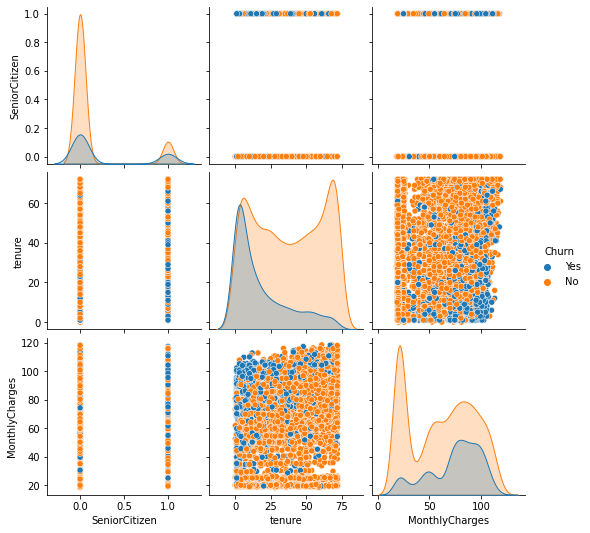

In [109]:
sns.pairplot(df, hue='Churn')


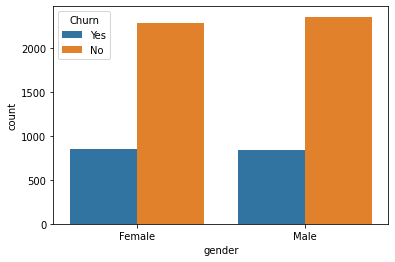

In [110]:
sns.countplot(x ='gender', hue='Churn', data=df)

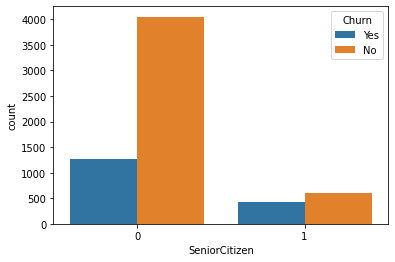

In [111]:
sns.countplot(x ='SeniorCitizen', hue='Churn', data=df)

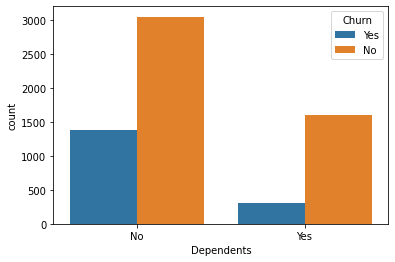

In [112]:
sns.countplot(x ='Dependents', hue='Churn', data=df)

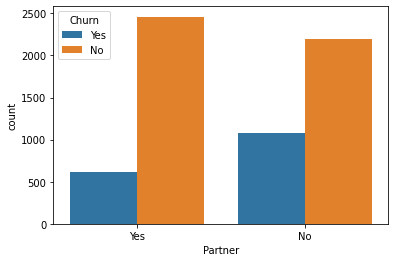

In [113]:
sns.countplot(x ='Partner', hue='Churn', data=df)

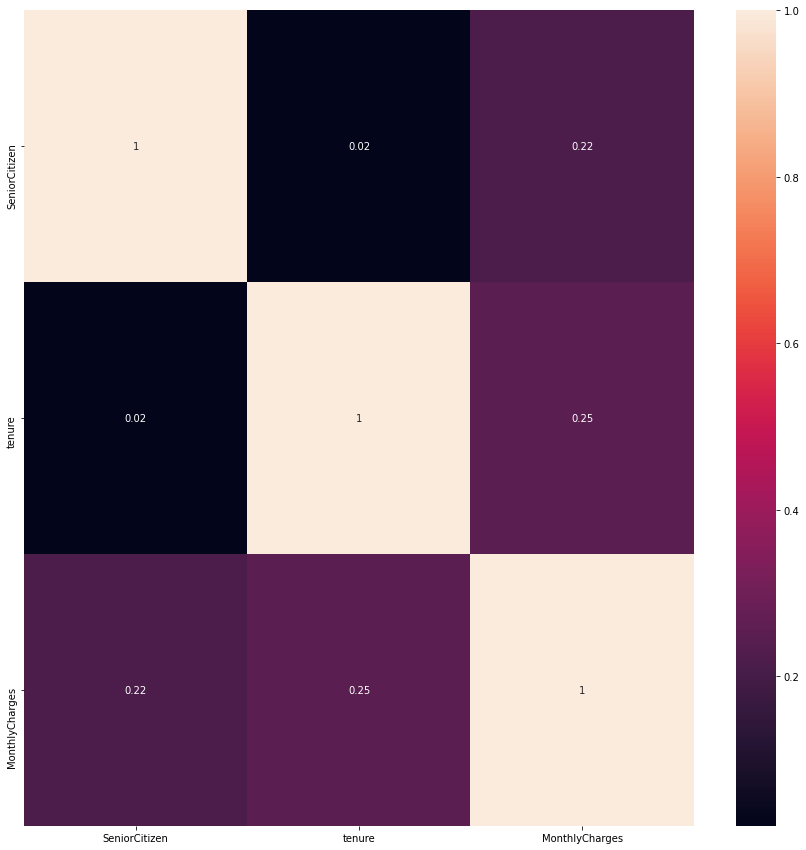

In [114]:
plt.figure(figsize=(15,15))
sns.heatmap(df.corr(), annot=True)

In [115]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

**Perform the data prep that needs to be done before splitting**

In [116]:
#Let's convert all the categorical variables into dummy variables
df_dummies = pd.get_dummies(df)
df_dummies.head()

,SeniorCitizen,tenure,MonthlyCharges,customerID_0003-MKNFE,customerID_0004-TLHLJ,customerID_0011-IGKFF,customerID_0013-EXCHZ,customerID_0013-MHZWF,customerID_0013-SMEOE,customerID_0014-BMAQU,customerID_0015-UOCOJ,customerID_0016-QLJIS,customerID_0017-DINOC,customerID_0018-NYROU,customerID_0019-EFAEP,customerID_0019-GFNTW,customerID_0020-INWCK,customerID_0020-JDNXP,customerID_0022-TCJCI,customerID_0023-HGHWL,customerID_0023-UYUPN,customerID_0023-XUOPT,customerID_0027-KWYKW,customerID_0030-FNXPP,customerID_0031-PVLZI,customerID_0032-PGELS,customerID_0036-IHMOT,customerID_0040-HALCW,customerID_0042-JVWOJ,customerID_0042-RLHYP,customerID_0048-LUMLS,customerID_0048-PIHNL,customerID_0052-DCKON,customerID_0052-YNYOT,customerID_0056-EPFBG,customerID_0057-QBUQH,customerID_0058-EVZWM,customerID_0060-FUALY,customerID_0064-SUDOG,customerID_0064-YIJGF,...,TotalCharges_971.3,TotalCharges_973.25,TotalCharges_973.35,TotalCharges_973.45,TotalCharges_973.55,TotalCharges_973.65,TotalCharges_973.95,TotalCharges_978,TotalCharges_978.6,TotalCharges_979.05,TotalCharges_98.35,TotalCharges_98.5,TotalCharges_981.45,TotalCharges_982.95,TotalCharges_985.05,TotalCharges_987.95,TotalCharges_989.05,TotalCharges_989.45,TotalCharges_99.45,TotalCharges_99.6,TotalCharges_99.75,TotalCharges_99.95,TotalCharges_990.3,TotalCharges_990.45,TotalCharges_990.85,TotalCharges_990.9,TotalCharges_992.7,TotalCharges_994.55,TotalCharges_994.8,TotalCharges_995.35,TotalCharges_996.85,TotalCharges_996.95,TotalCharges_997.65,TotalCharges_997.75,TotalCharges_998.1,TotalCharges_999.45,TotalCharges_999.8,TotalCharges_999.9,Churn_No,Churn_Yes
0,0,18,39.05,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,0,66,19.95,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
2,0,39,99.95,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
3,0,10,95.25,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
4,0,27,56.70,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0


In [117]:
df_dummies.columns

Index(['SeniorCitizen', 'tenure', 'MonthlyCharges', 'customerID_0003-MKNFE',
       'customerID_0004-TLHLJ', 'customerID_0011-IGKFF',
       'customerID_0013-EXCHZ', 'customerID_0013-MHZWF',
       'customerID_0013-SMEOE', 'customerID_0014-BMAQU',
       ...
       'TotalCharges_996.85', 'TotalCharges_996.95', 'TotalCharges_997.65',
       'TotalCharges_997.75', 'TotalCharges_998.1', 'TotalCharges_999.45',
       'TotalCharges_999.8', 'TotalCharges_999.9', 'Churn_No', 'Churn_Yes'],
      dtype='object', length=12305)

In [118]:
#Get Correlation of "Churn" with other variables:
# plt.figure(figsize=(15,8))
# df_dummies.corr()['Churn'].sort_values(ascending = False).plot(kind='bar') #   take alot of time 

In [119]:
df.drop(df.loc[df['TotalCharges']==' '].index, inplace=True)
df['TotalCharges']=pd.to_numeric(df['TotalCharges'])

In [120]:
df["Churn"] = df["Churn"].replace({'Yes':1,'No':0})
df["gender"]=df["gender"].replace({'Female':1,'Male':0})

In [121]:
dum=pd.get_dummies(df.iloc[:,1:20])
dum


,gender,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,PhoneService_No,PhoneService_Yes,MultipleLines_No,MultipleLines_No phone service,MultipleLines_Yes,InternetService_DSL,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,1,0,18,39.05,669.85,0,1,1,0,1,0,0,1,0,1,0,0,1,0,0,1,0,0,0,0,1,1,0,0,0,0,1,1,0,0,1,0,0,0,1,0,0,1,0
1,0,0,66,19.95,1269.10,1,0,0,1,0,1,1,0,0,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,1,0,0,1,0,0
2,1,0,39,99.95,3767.40,0,1,0,1,0,1,0,0,1,0,1,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0,1,1,0,0,0,1,0,1,0,0
3,0,0,10,95.25,1021.55,1,0,1,0,0,1,0,0,1,0,1,0,1,0,0,0,0,1,0,0,1,1,0,0,1,0,0,0,0,1,1,0,0,0,1,0,0,1,0
4,1,0,27,56.70,1652.95,1,0,1,0,0,1,1,0,0,1,0,0,0,0,1,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6333,0,0,36,95.00,3440.25,0,1,1,0,0,1,0,0,1,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,1,1,0,0,0,1,1,0,0,0
6334,1,0,2,80.45,137.10,1,0,1,0,0,1,1,0,0,0,1,0,0,0,1,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,1,0
6335,0,0,72,118.20,8547.15,1,0,1,0,0,1,0,0,1,0,1,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,1,0,0,1,0
6336,0,1,68,84.65,5683.60,0,1,0,1,0,1,0,0,1,0,1,0,1,0,0,0,0,1,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,1,0


4. Split your data into training and testing datasets...

In [122]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

**Single Feature**

In [123]:
from sklearn.model_selection import train_test_split

# defind the target and the input data from featur engeneer 
X = df.tenure
y = df.Churn.astype('int')


 # split the data  into train set and test set 
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.6, random_state=7)

5. Import, create, and fit a LogisticRegression model with 1 variable

In [124]:
from sklearn.linear_model import LogisticRegression # 1- initialze the model

lr = LogisticRegression()

In [125]:
lr.fit(pd.DataFrame(X_train), y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

6. Make predictions on your `X_test` values...

In [126]:
# Predict for training set
y_train_predict = lr.predict(pd.DataFrame(X_train))

y_train_predict

array([0, 0, 0, ..., 0, 0, 0])

In [127]:
# Predict for training set
y_test_predict  = lr.predict(pd.DataFrame(X_test))


In [128]:
# what do they look like? (show me some of the predictions)
y_test_predict

array([0, 0, 0, ..., 0, 0, 0])

7. Score your model...
- accuracy_score
- confusion_matrix

In [129]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_test_predict )


0.7381516587677726

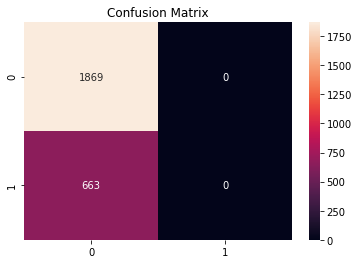

In [130]:
con = lr.predict(pd.DataFrame(X_test))
cf = confusion_matrix(y_test, con)
sns.heatmap(cf, annot=True , fmt='' ).set_title("Confusion Matrix");


8. Create, and fit a LogisticRegression model with **more than** 1 variable

**multiple Feature**

In [131]:
X=dum
y=df.Churn

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7)


In [132]:

lr2 = LogisticRegression()

In [133]:
lr2.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

9. Make predictions on your `X_test` values...

In [134]:
# Predict for training set
y_train_predict2 = lr2.predict(X_train)

y_train_predict2

array([1, 1, 0, ..., 1, 0, 0])

In [135]:
y_test_predict2  = lr2.predict(X_test)
y_test_predict2

array([1, 0, 0, ..., 1, 1, 1])

In [136]:
# what do they look like? (show me some of the predictions)
y_test_predict[1:5]

array([0, 0, 0, 0])

10. Score your model...
- accuracy_score
- confusion_matrix

In [137]:
accuracy_score(y_test,y_test_predict2 )

0.8088467614533965

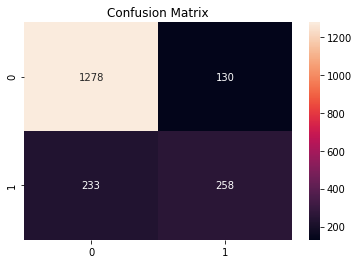

In [138]:
con = lr2.predict(X_test)
cf = confusion_matrix(y_test, con)
sns.heatmap(cf, annot=True ,fmt='').set_title("Confusion Matrix");

11. Which model is better? Why?

single feature 1st  **vs**   multiple feature 2nd

0.7381516587677726    **<**    0.8067403896787783 


When we did the comparison between the models, we found that in 1st model the accurcy is less than the 2nd modele  , so we obtain that when we use multiple featuer we got higher accuraty score 

12. Perform GridSearchCV with the better data

In [139]:
from sklearn.pipeline import make_pipeline

def LR(**kwargs):
    return make_pipeline(LogisticRegression(**kwargs))


In [140]:
from sklearn.model_selection import GridSearchCV

param_grid={ 'fit_intercept': [True, False],'solver': ['liblinear'],'max_iter': [10, 100, 250, 1000, 10000]}
LR =LogisticRegression()

grid =GridSearchCV(LR, param_grid, cv=7)


In [ ]:
grid.fit(X_train, y_train)

In [142]:
grid.best_params_

{'fit_intercept': True, 'max_iter': 100, 'solver': 'liblinear'}

13. Update the hyperparameters of your model (create and fit a new model with the results of GridSerachCV)

**Single Feature**

In [143]:
lr = LogisticRegression(fit_intercept= True, 
                        max_iter= 10 , 
                        solver='liblinear')

In [144]:
lr.fit(X_train, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=10,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [145]:
lr.predict(X_test)

array([1, 0, 0, ..., 0, 1, 1])

In [146]:
y_test.shape ,y_test_predict.shape

((1899,), (2532,))

In [147]:
# from sklearn.metrics import accuracy_score  # reshape((1899,2532))) Error
# accuracy_score(y_test,y_test_predict)

In [148]:

lr2 = LogisticRegression(fit_intercept= True, 
                        max_iter= 10 , 
                        solver='liblinear')

In [149]:
lr2.fit(X_train, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=10,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [150]:
lr2.predict(X_test)

array([1, 0, 0, ..., 0, 1, 1])

14. Score the new model... 
- r2_score
- some other metric of your choice

In [151]:
accuracy_score(y_test,y_test_predict2)

0.8088467614533965

Did the score change at all? Why?

Yes
multiple feature play good  with models

**single feature 1st <   multiple feature 2nd**

0.7381516587677726    <  0.8067403896787783 


## Bonus
Set up a SGDClassifier, score it, etc... https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDClassifier.html

Note: you may need more or less code cells, but here's 5.

**Single feture**

In [152]:

# defind the target and the input data from featur engeneer 
X = df.tenure
y = df.Churn.astype('int')


 # split the data  into train set and test set 
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.6, random_state=7)

In [153]:
from sklearn.linear_model import SGDClassifier

sgdc1 = SGDClassifier(max_iter=10000)

In [154]:
sgdc1.fit(pd.DataFrame(X_train),y_train)

SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='hinge',
              max_iter=10000, n_iter_no_change=5, n_jobs=None, penalty='l2',
              power_t=0.5, random_state=None, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False)

In [155]:
sgdc1.predict(pd.DataFrame(X_test))

array([0, 0, 1, ..., 0, 0, 0])

In [156]:
preds = sgdc1.predict(pd.DataFrame(X_test))

accuracy_score(y_test, preds)

0.7555292259083728

SGDClassifier with multiple feature

In [157]:
X=dum
y=df.Churn



X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7)


In [158]:
from sklearn.linear_model import SGDClassifier

sgdc = SGDClassifier(max_iter=10000)

In [159]:
sgdc.fit(X_train, y_train)

SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='hinge',
              max_iter=10000, n_iter_no_change=5, n_jobs=None, penalty='l2',
              power_t=0.5, random_state=None, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False)

In [160]:
sgdc.predict(X_test)


array([0, 0, 0, ..., 0, 0, 0])

In [161]:
preds = sgdc.predict(X_test)

accuracy_score(y_test, preds)

0.7588204318062138

In [162]:
from sklearn.model_selection import GridSearchCV

param_dict = {'loss': ['log', 'huber', 'epsilon_insensitive', 'squared_epsilon_insensitive'],
              'max_iter': [10, 100, 250, 1000, 10000]}

sgdc = SGDClassifier()

grid = GridSearchCV(sgdc, param_dict , cv=5)

In [ ]:
grid.fit(X_train, y_train)


In [164]:
grid.best_params_


{'loss': 'log', 'max_iter': 10}

In [165]:
sgdc = SGDClassifier(loss='log', max_iter=1000)

In [166]:
sgdc.fit(X_train, y_train)

SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='log', max_iter=1000,
              n_iter_no_change=5, n_jobs=None, penalty='l2', power_t=0.5,
              random_state=None, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False)

In [167]:
preds = sgdc.predict(X_test)

accuracy_score(y_test, preds) # that's wierd .. the accurcy is less than first time wuthout best param 

0.7582938388625592

**let's do it with single featur model sgdc1**

In [168]:
sgdc1 = SGDClassifier(loss='log', max_iter=1000)

In [169]:
sgdc1.fit(X_train, y_train)

SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='log', max_iter=1000,
              n_iter_no_change=5, n_jobs=None, penalty='l2', power_t=0.5,
              random_state=None, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False)

In [170]:
preds = sgdc1.predict(X_test)

accuracy_score(y_test, preds) 

0.7667193259610321

**single feature 1st <  < multiple feature 2nd**

0.0.7635597682991048    <    0.7661927330173776 

**in sum :**

multiple more accutate 
